## 19 Time Analysis Mini Series - Timezone Handling
Timezone handling is important while doing time series analysis. Pandas provides a way to create timezone aware datetimeIndex. Use tz_localize on dataframe or dataframe index to convert naive datetimes to timezone aware datetimes. You can also perform arithmetic between series having different time zones.

In [1]:
from IPython.display import Image
import pandas as pd

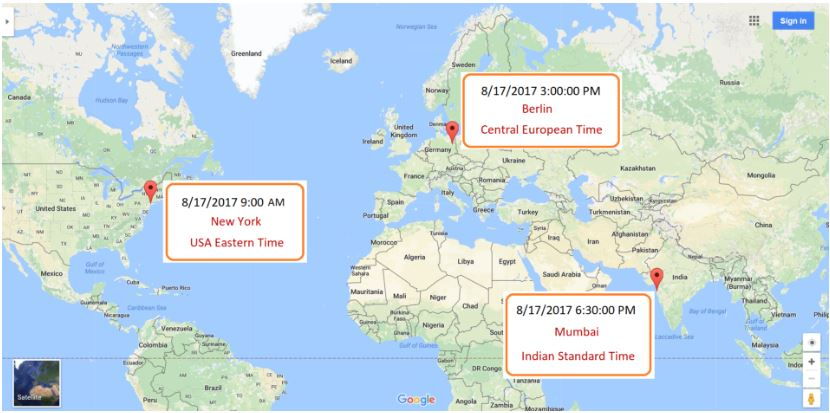

In [3]:
Image('D:\\Pandas\\CodeBasics\\datasets\\19timezone_world_map.jpg')

In [10]:
df = pd.read_csv("D:\\Pandas\\CodeBasics\\datasets\\19msft.csv", index_col='Date Time', parse_dates=True, sep = '\t')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [11]:
df.index # Just to check that we have indeed got a datetime index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

There are two types of datetime objects...<br>
1. Naive Datetime - Which does not have any awareness of timezones & <br>
2. Timezone aware datetime - Which contains information about specific timezones<br>

**So how can we convert the naive datetime object, that we see in the index above, to a timezone aware datetime index?**<br>
We can use the tz_localize function...

In [12]:
df = df.tz_localize(tz='US/Eastern') # We have to assign the command back to itself
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

Now we see that the data type of the index is indeed dataetime US/Eastern.<br> We also see the time given as 0900 minus 0400, which is because the US/Eastern timezone is four hours behind the UTC timezone for this locale.<br><br>
**Convert to Berlin time - tz_convert()**<br>
Now that we have converted the timezone into US/Eastern, we are going to convert it to the timezone for Berlin

In [13]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


Now we have 1500 and in Berlin it is UTC+0200 hours. 

**Where do we get these timezones from?**

In [15]:
from pytz import all_timezones # If you ever need to check a timezone
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

**Convert to Mumbai time**<br>
tz database doesn't have a Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that...

In [16]:
df.index = df.index.tz_convert('Asia/Calcutta') 
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


So we can see that 0900 in New York is 1830 in Mumbai which is UTC+05:30 hours. 

In [17]:
df.index = df.index.tz_convert('Asia/Calcutta') # You can use this function on the index as well

In [18]:
df.index # This has the same affect as the above command

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date Time', freq=None)

#### Using timezones in date_range
We know that we can use the date_range() function to create a date timeindex... 

In [19]:
rng = pd.date_range('1/1/2017 00:00', periods=10, freq='H')
rng

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

This creates naive datetime objects in your datetime index. You can create timezone aware objects by supplying tz arguments... 

In [20]:
td = pd.date_range('1/1/2017 00:00', periods=10, freq='H',tz='Europe/London')
td # We can see that the data type of our datetime index is now timezone aware
# In this case Europe/London

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

date_range will accept two types of timezone information. The one that we have supplied is from pytz. The other type of timezone that can be used is called dateutil.

In [21]:
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td # This is what the dateutil command looks like

DatetimeIndex(['2012-03-06 00:00:00+00:00', '2012-03-06 01:00:00+00:00',
               '2012-03-06 02:00:00+00:00', '2012-03-06 03:00:00+00:00',
               '2012-03-06 04:00:00+00:00', '2012-03-06 05:00:00+00:00',
               '2012-03-06 06:00:00+00:00', '2012-03-06 07:00:00+00:00',
               '2012-03-06 08:00:00+00:00', '2012-03-06 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('GB-Eire')]', freq='H')

It does create a London timezone but it does look a little different from pytz. The main difference between the two is that pytz will use all the timezones listed above whereas dateutil will only use those available in your OS

**Airthmetic between different timezones**<br><br>
**Creating our datetime indices**

In [22]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [23]:
b = s.tz_localize(tz="Europe/Berlin") # We use localize because the index above has naive values
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
Freq: 30T, dtype: int64

In [24]:
m = s.tz_localize(tz="Asia/Calcutta")
m.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='30T')

**Now for the arithematic**

In [25]:
b + m

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
Freq: 30T, dtype: float64

This converts both of the individual time series to UTC and then it performed the maths and then tried to align the datapoints

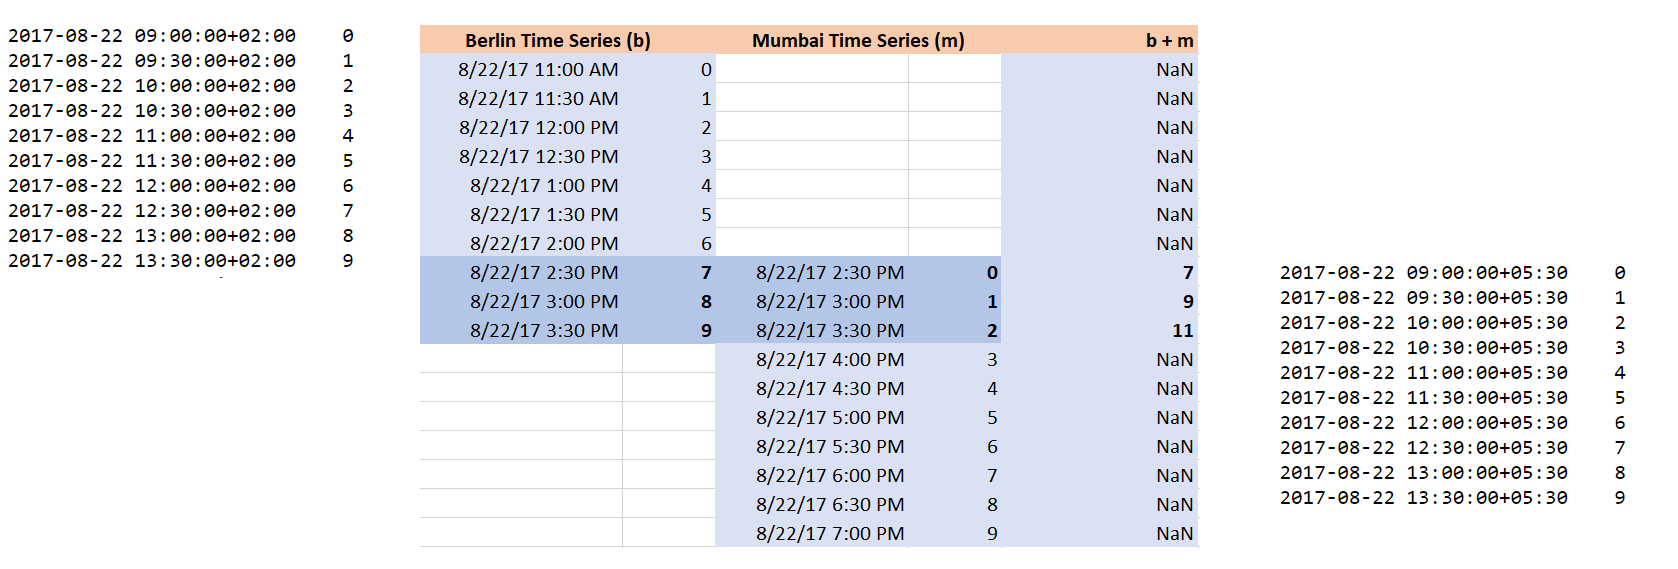

In [26]:
Image('D:\\Pandas\\CodeBasics\\datasets\\19alignment.png')